# Detecting Human Faces

Before anything else, a PiCamera has to be connected to the Raspberry Pi.

In this notebook, we are using pre-trained Haar-Cascade classifiers for human faces and eyes. These pretrained classifiers which come with `opencv` are stored in an XML format.

In [6]:
import picamera
import numpy as np
import cv2 as cv
import IPython
import io
import time
from PIL import Image

Since we are reading a continuous stream of RGB photos taken from the video port, we also need to display them continuously. For this matter we need the following function to do this.

In [7]:
# Use 'jpeg' instead of 'png' (~5 times faster)
def showarray(a, fmt='jpeg'):
    '''
    Function to display an image within a Jupyter notebook.
    '''
    f = io.BytesIO()
    Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue(), width = 480, height = 360))

Now, let's load up the classifiers for eyes and faces. These 2 files should be located in the current directory.

In [8]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

The following function is used to detect the human faces and eyes. `detectMultiScale` returns a list of coordinates where it detected something and if there's something, then it proceeds drawing green and red rectangles around the detected features. The image that now contains these red/green boxes is returned to where it got called.

In [9]:
def detectFacesAndEyes(img_array):
    '''
    Function to detect eyes and faces using a Haar-Cascade classifier.
    '''
    gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv.rectangle(img_array,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img_array[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

Capture frames at the highest rate possible and on each frame run the Haar-Cascade detection system.

Finally, on each iteration, the image gets to be displayed in JupyterLab.

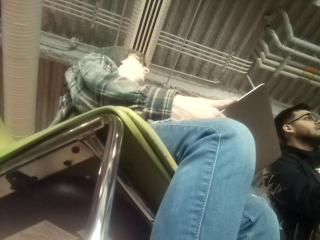

In [ ]:
with picamera.PiCamera() as camera:
    camera.resolution = (320, 240)
    camera.framerate = 30
    camera.rotation = 180
    freshest_frame = np.empty((240, 320, 3), dtype = np.uint8)
    while True:
        camera.capture(freshest_frame, use_video_port = True, format = 'rgb')
        detectFacesAndEyes(freshest_frame)
        showarray(freshest_frame)
        IPython.display.clear_output(wait = True)